# Análise IGM 2016

Arquivo obtido no site: http://www.igm.cfa.org.br/downloads

Esta análise visa traçar uma correlação entre a situação fiscal dos municípios com o seu IDHM (índice de desenvolvimento municipal), além de considerar fatores como número de servidores, índice de terceirização dos serviços básicos, gastos com educação e saúde.


In [1]:
import pandas as pd #importando pandas
import matplotlib.pyplot as plt #importando matplotlib
import numpy as np #importando numpy
import seaborn as sns #impotando seaborn

In [2]:
xl = pd.read_excel("dados_IGM-CFA_2016.xlsx",skiprows = 1, usecols = [3, 4, 7, 13, 15, 34, 35, 36, 37, 38]) 
# Carregar o arquivo xlsx e transformas em dataframe

In [3]:
# Exibindo as 5 primeiras linhas
xl.head()

,Estado,Nome,População 2016 (IBGE),Gastos saúde e educação per capita,Colocação Nacional em Gastos e Finanças Públicas,Atendimento médico,Vulnerabilidade,Educação,IDHM,Mortalidade infantil
0,SP,ILHABELA,32782,0.939078,1º,0.547058,0.811649,0.801973,0.747017,0.883229
1,SP,SANTANA DE PARNAIBA,129261,0.762068,6º,0.523518,0.866214,0.761753,0.885442,0.810350
2,SC,BOMBINHAS,18052,0.586666,13º,0.230795,0.877832,0.800522,0.806683,0.929287
3,SP,SAO BERNARDO DO CAMPO,822242,0.473280,89º,0.099539,0.896793,0.760839,0.863962,0.882146
4,DF,BRASILIA,2977216,1.000000,20º,0.357087,0.882516,0.618705,0.909308,0.850447


In [4]:
# Exibindo as 5 ultimas linhas
xl.tail()

,Estado,Nome,População 2016 (IBGE),Gastos saúde e educação per capita,Colocação Nacional em Gastos e Finanças Públicas,Atendimento médico,Vulnerabilidade,Educação,IDHM,Mortalidade infantil
5565,TO,TAIPAS DO TOCANTINS,2112,0.407700,459º,NaN,NaN,NaN,NaN,NaN
5566,TO,TALISMA,2757,0.419006,1808º,0.336666,0.767106,0.372483,0.503580,0.731509
5567,TO,TOCANTINIA,7387,0.141237,3672º,0.129573,0.506227,0.250082,0.348449,0.652940
5568,TO,TUPIRAMA,1813,NaN,NaN,0.234456,0.604209,0.696798,0.541766,0.761311
5569,TO,WANDERLANDIA,11622,0.092519,1767º,0.171242,0.570915,0.638419,0.465394,0.501219


In [5]:
# Criando um dataframe com base no arquivo excel
# Precisamos pular as 2 primeiras linhas (skiprows=2) e as
# ultimas 16 linhas (skipfooter=16)
xl = pd.read_excel('dados_IGM-CFA_2016.xlsx', usecols = [3, 4, 7, 13, 15, 34, 35, 36, 37, 38], skiprows = 2, skipfooter = 16)

#renomeando as colunas
xl.columns = ['Estado', 'Município', 'População 2016', 'Gastos saúde e educação per capita',
              'Colocação Nacional em Gastos e Finanças Públicas', 'Atendimento Médico', 
              'Vulnerabilidade', 'Educação', 'IDHM', 'Mortalidade Infantil' ]

In [6]:
# Exibindo as 5 ultimas linhas
xl.tail()

,Estado,Município,População 2016,Gastos saúde e educação per capita,Colocação Nacional em Gastos e Finanças Públicas,Atendimento Médico,Vulnerabilidade,Educação,IDHM,Mortalidade Infantil
5548,TO,PUGMIL,2621,0.304593,2037º,0.190114,0.536495,0.522652,0.539379,0.764021
5549,TO,RECURSOLANDIA,4182,0.348711,2684º,NaN,NaN,NaN,NaN,NaN
5550,TO,RIO DOS BOIS,2787,NaN,NaN,0.200467,0.493706,0.423890,0.412888,0.709835
5551,TO,SAMPAIO,4498,0.203749,2980º,0.121713,0.454624,0.568080,0.389021,0.186941
5552,TO,SANDOLANDIA,3410,0.336398,2122º,0.178552,0.677464,0.446236,0.515513,0.693579


In [7]:
xl.shape

(5553, 10)

In [8]:
#renomeando as colunas
xl.columns = ['Estado', 'Município', 'População 2016', 'Gastos saúde e educação per capita',
              'Colocação Nacional em Gastos e Finanças Públicas', 'Atendimento Médico', 
              'Vulnerabilidade', 'Educação', 'IDHM', 'Mortalidade Infantil' ]
xl.head(5)

,Estado,Município,População 2016,Gastos saúde e educação per capita,Colocação Nacional em Gastos e Finanças Públicas,Atendimento Médico,Vulnerabilidade,Educação,IDHM,Mortalidade Infantil
0,SP,SANTANA DE PARNAIBA,129261,0.762068,6º,0.523518,0.866214,0.761753,0.885442,0.810350
1,SC,BOMBINHAS,18052,0.586666,13º,0.230795,0.877832,0.800522,0.806683,0.929287
2,SP,SAO BERNARDO DO CAMPO,822242,0.473280,89º,0.099539,0.896793,0.760839,0.863962,0.882146
3,DF,BRASILIA,2977216,1.000000,20º,0.357087,0.882516,0.618705,0.909308,0.850447
4,SP,SANTOS,434359,0.587334,88º,0.273675,0.925413,0.846209,0.947494,0.858846


In [9]:
# Olhando os tipos de dados
xl.dtypes

Estado                                               object
Município                                            object
População 2016                                        int64
Gastos saúde e educação per capita                  float64
Colocação Nacional em Gastos e Finanças Públicas     object
Atendimento Médico                                  float64
Vulnerabilidade                                     float64
Educação                                            float64
IDHM                                                float64
Mortalidade Infantil                                float64
dtype: object

In [10]:
xl.describe()

,População 2016,Gastos saúde e educação per capita,Atendimento Médico,Vulnerabilidade,Educação,IDHM,Mortalidade Infantil
count,5.553000e+03,4620.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000
mean,3.709644e+04,0.300635,0.206640,0.683520,0.553151,0.518822,0.710697
std,2.173385e+05,0.143053,0.120792,0.181988,0.135446,0.171968,0.191225
min,8.150000e+02,0.000389,0.000189,0.000130,0.001434,0.000000,0.000000
25%,5.507000e+03,0.201673,0.125600,0.532263,0.466228,0.374702,0.587917
50%,1.159600e+04,0.272498,0.177518,0.709510,0.556917,0.534606,0.772148
75%,2.513000e+04,0.365529,0.253568,0.842837,0.648439,0.658711,0.856137
max,1.203818e+07,1.000000,0.998411,0.999609,0.996272,1.000000,1.000000


In [11]:
xl[['Estado', 'Município', 'População 2016', 'Colocação Nacional em Gastos e Finanças Públicas', 'IDHM', 'Educação']]

xl.head(11)População 2016

,Estado,Município,População 2016,Gastos saúde e educação per capita,Colocação Nacional em Gastos e Finanças Públicas,Atendimento Médico,Vulnerabilidade,Educação,IDHM,Mortalidade Infantil
0,SP,SANTANA DE PARNAIBA,129261,0.762068,6º,0.523518,0.866214,0.761753,0.885442,0.810350
1,SC,BOMBINHAS,18052,0.586666,13º,0.230795,0.877832,0.800522,0.806683,0.929287
2,SP,SAO BERNARDO DO CAMPO,822242,0.473280,89º,0.099539,0.896793,0.760839,0.863962,0.882146
3,DF,BRASILIA,2977216,1.000000,20º,0.357087,0.882516,0.618705,0.909308,0.850447
4,SP,SANTOS,434359,0.587334,88º,0.273675,0.925413,0.846209,0.947494,0.858846
5,SP,INDAIATUBA,235367,0.372160,96º,0.178164,0.935564,0.742765,0.823389,0.867787
6,RS,GRAMADO,34832,0.515499,26º,0.192965,0.949824,0.545643,0.766110,0.942834
7,SC,BALNEARIO CAMBORIU,131727,0.421429,83º,0.174812,0.956737,0.775912,0.959427,0.994310
8,SC,RIO DO SUL,68217,0.436873,329º,0.064166,0.921191,0.877108,0.856802,0.986183
9,SP,SAO SEBASTIAO,84294,0.757390,4º,0.204190,0.834185,0.809309,0.785203,0.979680


In [12]:
# Vamos verificar valores nulos na coluna Educação
xl['Educação'].isnull().sum()

581

In [13]:
#Retirando valores nulos na coluna Educação
xl['Educação'].dropna(inplace = True)

In [14]:
# Vamos verificar se os valores nulos na coluna Educação foram retirados
xl['Educação'].isnull().sum()

0

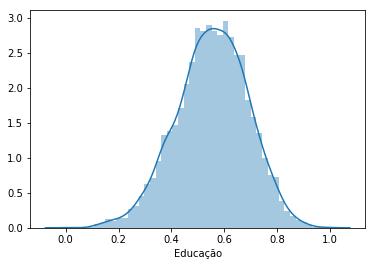

In [15]:
#histograma distribuição da Educação
sns.distplot(xl['Educação'])

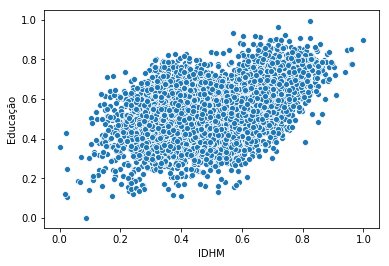

In [16]:
#Plot correlação Educação x IDHM
sns.scatterplot(x = 'IDHM', y = 'Educação', data = xl)

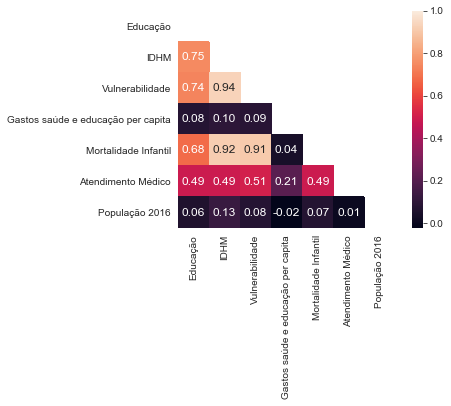

In [20]:
#plot de correlação
import matplotlib.pyplot as plt
import numpy as np

k=10
corrmat = abs(xl.corr(method='spearman')) # correlação de spearman
cols = corrmat.nlargest(k, 'Educação').index # o k-ésimo maior valor
xx = np.nan_to_num(xl[cols].values)
cm = np.corrcoef(xx.T) # calcula a correlação

mask = np.zeros_like(cm) 
mask[np.triu_indices_from(mask)] = True 
sns.set_style("white")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 12}, 
                yticklabels=cols.values, xticklabels=cols.values, mask = mask)
plt.show()

In [21]:
# Qual o maior população em 2016?
xl['População 2016'].max()

12038175

In [25]:
# Vamos verificar valores nulos na coluna IDHM
xl['IDHM'].isnull().sum()

581

In [26]:
#Retirando valores nulos na coluna IDHM
xl['IDHM'].dropna(inplace = True)

In [27]:
# Vamos verificar se os valores nulos na coluna IDHM foram retirados
xl['IDHM'].isnull().sum()

0

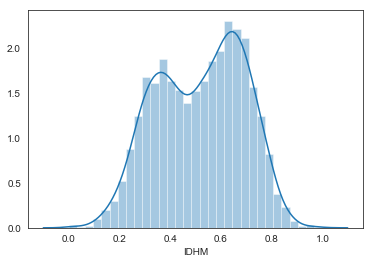

In [28]:
#histograma distribuição da IDHM
sns.distplot(xl['IDHM'])

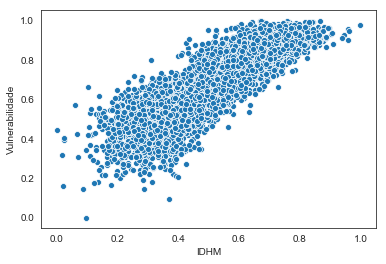

In [29]:
#Plot correlação IDHM x Vulnerabilidade
sns.scatterplot(x = 'IDHM', y = 'Vulnerabilidade', data = xl)

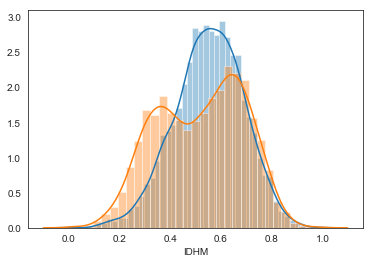

In [30]:
#Comparando as distribuições entre e Educação e IDMH
sns.distplot(xl['Educação'])
sns.distplot(xl['IDHM'])

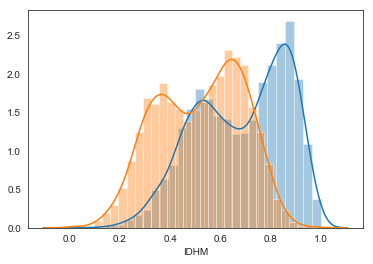

In [32]:
#Comparando as distribuições entre Vulnerabilidade e IDMH
sns.distplot(xl['Vulnerabilidade'].dropna()) #limpeza de null
sns.distplot(xl['IDHM'])

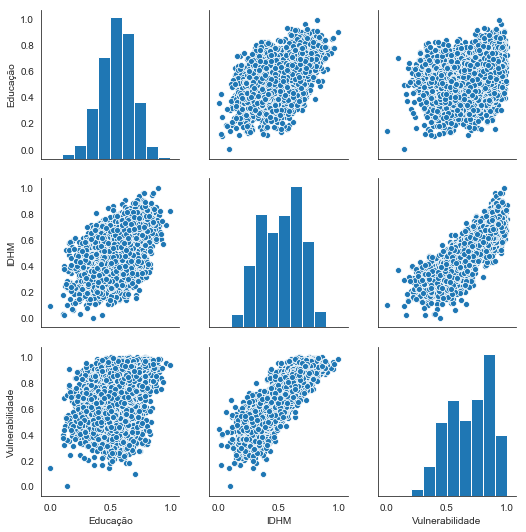

In [35]:
sns.pairplot(xl[['Educação', 'IDHM', 'Vulnerabilidade']].dropna())

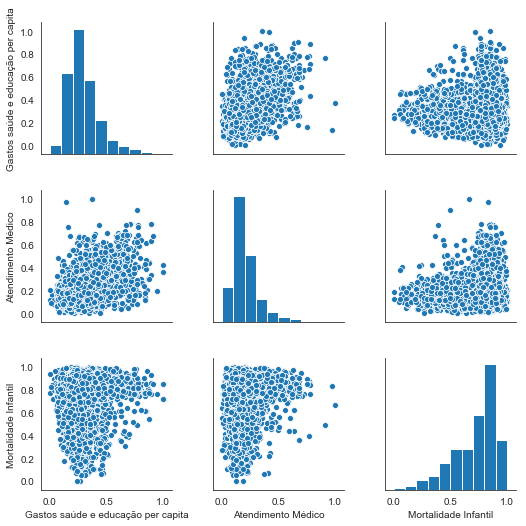

In [37]:
sns.pairplot(xl[['Gastos saúde e educação per capita','Atendimento Médico', 'Mortalidade Infantil' ]].dropna())

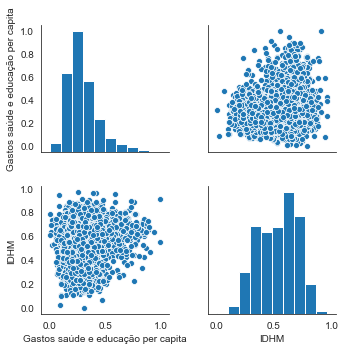

In [38]:
sns.pairplot(xl[['Gastos saúde e educação per capita', 'Colocação Nacional em Gastos e Finanças Públicas', 'IDHM']].dropna())

Text(0,0.5,'Educação')

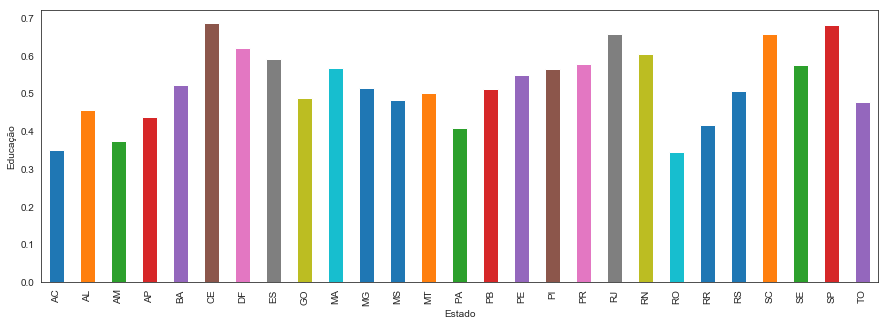

In [41]:
#Média de Educação por Estado
ax = xl.groupby('Estado').mean()['Educação'].plot.bar(figsize = (15, 5))
ax.set_ylabel('Educação')

In [48]:
xl.dropna(subset = ['Educação'], inplace  = True)

In [50]:
#Máxima de Educação
xl[xl['Educação'] == xl['Educação'].max()]

,Estado,Município,População 2016,Gastos saúde e educação per capita,Colocação Nacional em Gastos e Finanças Públicas,Atendimento Médico,Vulnerabilidade,Educação,IDHM,Mortalidade Infantil
4557,PE,FERNANDO DE NORONHA,2974,NaN,NaN,0.361787,0.934512,0.996272,0.823389,0.866974


Text(0,0.5,'Educação')

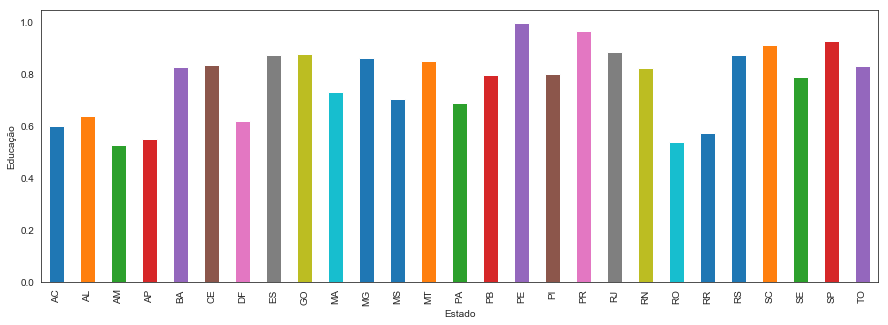

In [42]:
#Máxima de Educação por Estado
ax = xl.groupby('Estado').max()['Educação'].plot.bar(figsize = (15, 5))
ax.set_ylabel('Educação')

In [51]:
#Mínima de Educação por Estado
xl[xl['Educação'] == xl['Educação'].min()]

,Estado,Município,População 2016,Gastos saúde e educação per capita,Colocação Nacional em Gastos e Finanças Públicas,Atendimento Médico,Vulnerabilidade,Educação,IDHM,Mortalidade Infantil
3413,AM,SANTA ISABEL DO RIO NEGRO,23092,NaN,NaN,0.042239,0.143843,0.001434,0.085919,0.474126


Text(0,0.5,'Educação')

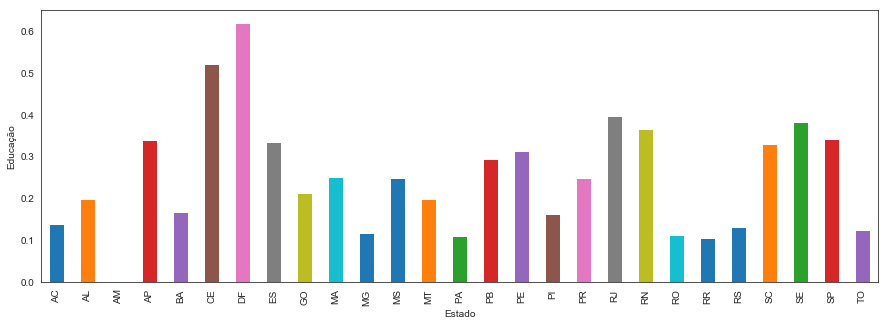

In [43]:
#Mínima de Educação por Estado
ax = xl.groupby('Estado').min()['Educação'].plot.bar(figsize = (15, 5))
ax.set_ylabel('Educação')